In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pylab
import seaborn as sns
import re
import nltk
plt.style.use('fivethirtyeight')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import warnings
warnings.filterwarnings("ignore")

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
os.chdir(r"C:\Users\anchhabra\Desktop\Check_case_study")

In [18]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--","#NAME?","NULL","NA","#N/A"]
raw_data = pd.read_csv("Training_Data.csv",na_values= missing_values)

In [19]:
raw_data.tail(5)

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
11995,11996,2590.892697,25770808,97737,2185034,5998,147474,176056,86438176,1616130,...,74.08,19.09,104.12,33.95,45.16,78.51,8272828,457864,0.3466,45.62
11996,11997,156.792378,37456881,63451,12303996,186513,248001,112522,721308843,1767765,...,49.05,36.98,110.44,32.43,43.95,78.55,4472051,458844,0.2238,38.29
11997,11998,208.095996,24982441,121518,8765824,61403,110445,144528,676086883,3122744,...,22.32,32.32,109.93,40.51,48.42,74.72,1575934,563762,0.0703,44.99
11998,11999,214.557394,35213911,47191,12857291,135013,275713,56677,117846954,2635366,...,73.26,32.73,105.35,42.94,44.48,63.15,9391109,582726,0.0599,32.88
11999,12000,71.037805,37143495,14601,7249412,345794,212884,18429,360803137,1333291,...,76.07,40.88,116.12,35.92,44.83,71.42,11713937,312761,0.1015,43.36


## Converting the data into 429 equal period to sync in with Test data

In [20]:
raw_data['decile'] = pd.qcut(raw_data['Day'], 429, labels=False)

In [21]:
raw_data.tail(4)

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory,decile
11996,11997,156.792378,37456881,63451,12303996,186513,248001,112522,721308843,1767765,...,36.98,110.44,32.43,43.95,78.55,4472051,458844,0.2238,38.29,428
11997,11998,208.095996,24982441,121518,8765824,61403,110445,144528,676086883,3122744,...,32.32,109.93,40.51,48.42,74.72,1575934,563762,0.0703,44.99,428
11998,11999,214.557394,35213911,47191,12857291,135013,275713,56677,117846954,2635366,...,32.73,105.35,42.94,44.48,63.15,9391109,582726,0.0599,32.88,428
11999,12000,71.037805,37143495,14601,7249412,345794,212884,18429,360803137,1333291,...,40.88,116.12,35.92,44.83,71.42,11713937,312761,0.1015,43.36,428


In [55]:
train_data = raw_data.groupby(raw_data['decile'],as_index = False)['EQ', 'Social_Search_Impressions', 'Social_Search_Working_cost',
        'Digital_Impressions', 'Digital_Working_cost',
        'Print_Impressions.Ads40', 'Print_Working_Cost.Ads50',
        'OOH_Impressions', 'OOH_Working_Cost', 'SOS_pct',
        'Digital_Impressions_pct', 'CCFOT', 'Median_Temp', 'Median_Rainfall',
        'Fuel_Price', 'Inflation', 'Trade_Invest', 'Brand_Equity',
        'Avg_EQ_Price', 'Any_Promo_pct_ACV', 'Any_Feat_pct_ACV',
        'Any_Disp_pct_ACV', 'EQ_Base_Price', 'Est_ACV_Selling', 'pct_ACV',
        'Avg_no_of_Items', 'pct_PromoMarketDollars_Category', 'RPI_Category',
        'Magazine_Impressions_pct', 'TV_GRP', 'Competitor1_RPI',
        'Competitor2_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
        'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
        'RPI_Subcategory'].mean()

In [56]:
train_data.tail(4)

,decile,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
425,425,601.853906,1.930520e+07,67957.464286,6.402126e+06,206699.392857,173221.642857,86259.964286,4.810595e+08,1.930008e+06,...,51.487857,29.872500,106.110357,38.859286,46.086071,68.653571,6.700477e+06,576062.107143,0.216750,38.863929
426,426,474.558013,1.963702e+07,62683.142857,6.221107e+06,215927.714286,189745.214286,107195.357143,4.424750e+08,1.685021e+06,...,45.556786,26.106071,107.341429,38.613571,46.466429,71.186786,6.463998e+06,521819.785714,0.191511,41.154643
427,427,476.039708,1.964499e+07,54443.678571,6.246626e+06,234465.821429,193963.678571,90640.178571,4.712279e+08,2.187270e+06,...,40.460714,28.391071,106.496071,38.313214,46.373214,69.537143,6.681125e+06,577864.535714,0.230471,38.984643
428,428,466.351720,2.219888e+07,66185.428571,6.418790e+06,213342.000000,213725.607143,83239.035714,4.789062e+08,1.917576e+06,...,49.671429,29.572857,107.359643,37.731429,46.513571,70.475714,6.404870e+06,544923.714286,0.183439,40.286071


In [83]:
train_data.to_csv('train_data.csv')

Text(0.5, 0, 'Median Temprature')

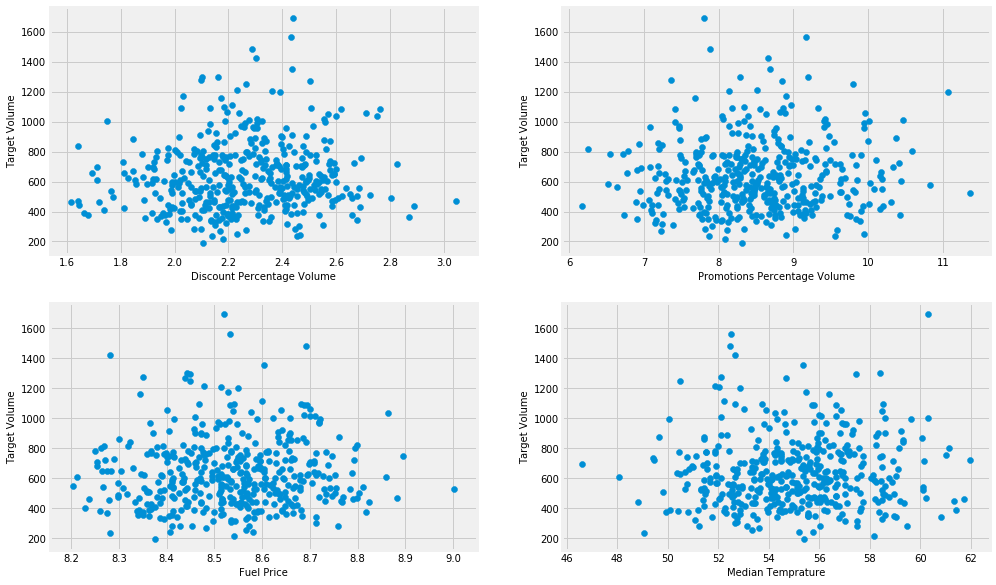

In [76]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.scatter(train_data['Any_Disp_pct_ACV'],train_data['EQ'])
plt.ylabel("Target Volume", size=10)
plt.xlabel("Discount Percentage Volume",size = 10)

plt.subplot(2,2,2)
plt.scatter(train_data['Any_Promo_pct_ACV'],train_data['EQ'])
plt.ylabel("Target Volume", size=10)
plt.xlabel("Promotions Percentage Volume",size = 10)

plt.subplot(2, 2, 3)
plt.scatter(train_data['Fuel_Price'],train_data['EQ'])
plt.ylabel("Target Volume", size=10)
plt.xlabel("Fuel Price",size = 10)

plt.subplot(2, 2, 4)
plt.scatter(train_data['Median_Temp'],train_data['EQ'])
plt.ylabel("Target Volume", size=10)
plt.xlabel("Median Temprature",size = 10)

Text(0.5, 0, 'Competitor 4 RPI')

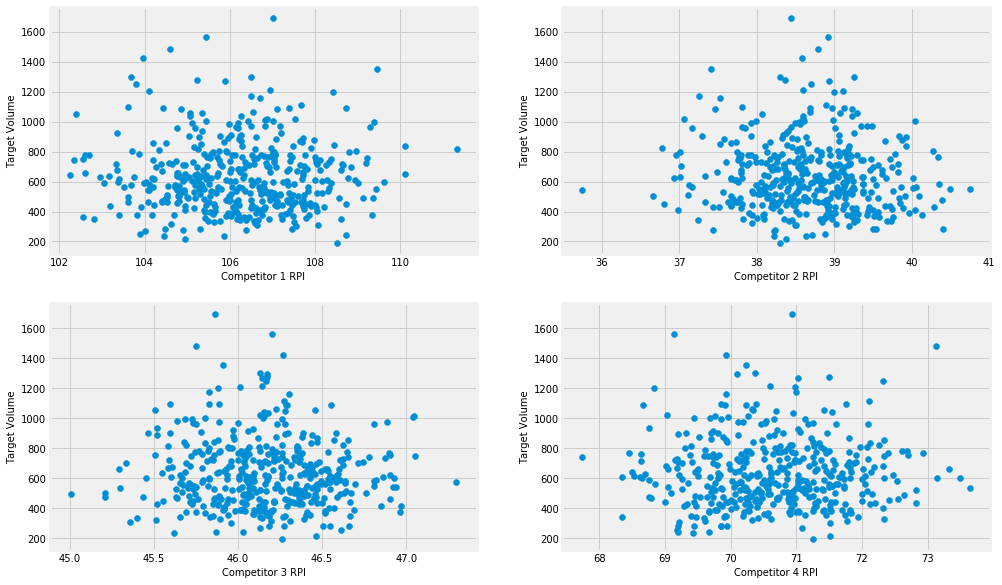

In [75]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.scatter(train_data['Competitor1_RPI'],train_data['EQ'])
plt.ylabel("Target Volume", size=10)
plt.xlabel("Competitor 1 RPI",size = 10)

plt.subplot(2,2,2)
plt.scatter(train_data['Competitor2_RPI'],train_data['EQ'])
plt.ylabel("Target Volume", size=10)
plt.xlabel("Competitor 2 RPI",size = 10)

plt.subplot(2, 2, 3)
plt.scatter(train_data['Competitor3_RPI'],train_data['EQ'])
plt.ylabel("Target Volume", size=10)
plt.xlabel("Competitor 3 RPI",size = 10)

plt.subplot(2, 2, 4)
plt.scatter(train_data['Competitor4_RPI'],train_data['EQ'])
plt.ylabel("Target Volume", size=10)
plt.xlabel("Competitor 4 RPI",size = 10)